I wanted to do some basic image recognition. Trying out some introductory exercise. Testing out the MNIST dataset and testing out Tensorflow


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time



In [2]:
# %% MNIST dataset
data = pd.read_csv('train.csv')
y = data.values[:,0]
X = data.values[:,1:]


Plotting 1 of 25
Plotting 2 of 25
Plotting 3 of 25
Plotting 4 of 25
Plotting 5 of 25
Plotting 6 of 25
Plotting 7 of 25
Plotting 8 of 25
Plotting 9 of 25
Plotting 10 of 25
Plotting 11 of 25
Plotting 12 of 25
Plotting 13 of 25
Plotting 14 of 25
Plotting 15 of 25
Plotting 16 of 25
Plotting 17 of 25
Plotting 18 of 25
Plotting 19 of 25
Plotting 20 of 25
Plotting 21 of 25
Plotting 22 of 25
Plotting 23 of 25
Plotting 24 of 25
Plotting 25 of 25


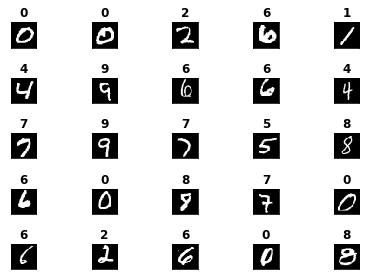

In [3]:
# plot 25 random digits
plt.figure()
for j, i in enumerate(np.random.choice(np.arange(len(y)), 25)): 
    print('Plotting %i of 25'%(j+1))
    plt.subplot(5,5, j+1)
    grayscale = X[i,:]
    a = grayscale.reshape(28,28)
    # plot image
    plt.imshow(a, cmap='gray', vmin=0, vmax=255)
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    plt.title(y[i],fontweight='bold')

plt.tight_layout()

In [4]:

# %% Tensorflow
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras import activations
# from tensorflow.keras.utils import np_utils
from sklearn.preprocessing import OneHotEncoder

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X/255, y, test_size=0.25, random_state=123)


In [6]:
# %% Constructing as matrices
Xi_train = []
Xi_test = []
for i in range(len(y_train)):
    Xi_train.append(X_train[i,:].reshape(28,28,1))
for i in range(len(y_test)):
    Xi_test.append(X_test[i,:].reshape(28,28,1))

Xi_train = np.array(Xi_train)
Xi_test = np.array(Xi_test)

enc = OneHotEncoder()
y_train = enc.fit_transform(y_train.reshape(-1,1))
y_train = y_train.toarray()
y_test = enc.transform(y_test.reshape(-1,1)).toarray()

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Plotting 1 of 25
Plotting 2 of 25
Plotting 3 of 25
Plotting 4 of 25
Plotting 5 of 25
Plotting 6 of 25
Plotting 7 of 25
Plotting 8 of 25
Plotting 9 of 25
Plotting 10 of 25
Plotting 11 of 25
Plotting 12 of 25
Plotting 13 of 25
Plotting 14 of 25
Plotting 15 of 25
Plotting 16 of 25
Plotting 17 of 25
Plotting 18 of 25
Plotting 19 of 25
Plotting 20 of 25
Plotting 21 of 25
Plotting 22 of 25
Plotting 23 of 25
Plotting 24 of 25
Plotting 25 of 25


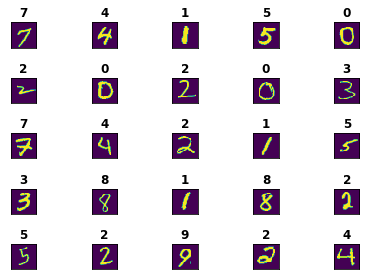

In [7]:
# plot 25 random digits
plt.figure()
for j, i in enumerate(np.random.choice(np.arange(len(y_train)), 25)): 
    print('Plotting %i of 25'%(j+1))
    plt.subplot(5,5, j+1)
    # plot image
    plt.imshow(Xi_train[i,:,:,0], cmap='viridis', vmin=0, vmax=1)
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    plt.title(np.argmax(y_train,axis=1)[i],fontweight='bold')

plt.tight_layout()

In [8]:

# %% Constructing CNN
t0 = time.time()
print('Constructing CNN')
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# %% adding the Dense Model afterwards
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
# model.add(activations('softmax'))

# %% Compiling Model
print('Compiling Model')
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
t1 = time.time()
print('Time to compile model: %.1f s'%(t1 - t0))

Constructing CNN
Compiling Model
Time to compile model: 104.3 s


In [9]:
# %% Training Model
t0 = time.time()
model.fit(Xi_train, y_train, epochs=5)
t1 = time.time()
print('Time to compile model: %.1f s'%(t1 - t0))

Epoch 1/5
985/985 [==============================] - 5s 5ms/step - loss: 0.2160 - accuracy: 0.9343
Epoch 2/5
985/985 [==============================] - 4s 4ms/step - loss: 0.0614 - accuracy: 0.9809
Epoch 3/5
985/985 [==============================] - 5s 5ms/step - loss: 0.0446 - accuracy: 0.9855
Epoch 4/5
985/985 [==============================] - 5s 5ms/step - loss: 0.0328 - accuracy: 0.9898
Epoch 5/5
985/985 [==============================] - 5s 5ms/step - loss: 0.0256 - accuracy: 0.9922
Time to compile model: 45.9 s


Predicting 1 of 25
Predicting 2 of 25
Predicting 3 of 25
Predicting 4 of 25
Predicting 5 of 25
Predicting 6 of 25
Predicting 7 of 25
Predicting 8 of 25
Predicting 9 of 25
Predicting 10 of 25
Predicting 11 of 25
Predicting 12 of 25
Predicting 13 of 25
Predicting 14 of 25
Predicting 15 of 25
Predicting 16 of 25
Predicting 17 of 25
Predicting 18 of 25
Predicting 19 of 25
Predicting 20 of 25
Predicting 21 of 25
Predicting 22 of 25
Predicting 23 of 25
Predicting 24 of 25
Predicting 25 of 25


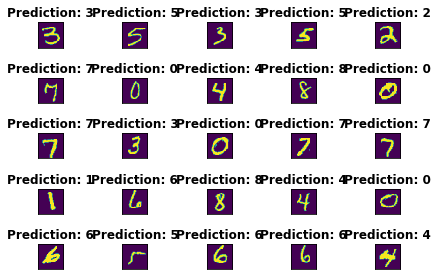

In [10]:
# Checking predictions
plt.figure()
for j, i in enumerate(np.random.choice(np.arange(len(y_test)), 25)): 
    print('Predicting %i of 25'%(j+1))
    plt.subplot(5,5, j+1)
    # plot image
    plt.imshow(Xi_test[i,:,:,0], cmap='viridis', vmin=0, vmax=1)
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    
    pred = model.predict(Xi_test[i,:,:,:].reshape(1,28,28,1))
    caption = 'Prediction: %i'%np.argmax(pred)
    
    plt.title(caption,fontweight='bold')

plt.tight_layout()

In [11]:
# submission
submission_data = pd.read_csv('test.csv').values/255

Xs = []
for i in range(len(submission_data)):
    Xs.append(submission_data[i,:].reshape(28,28,1))
Xs = np.array(Xs)

pred_s = model.predict(Xs)
results = np.argmax(pred_s,axis=1)

df_output = pd.DataFrame({
    'ImageId':np.arange(len(submission_data))+1,
    'Label':results})
df_output.to_csv('submissionv1.csv',index=None)
